## 구글 드라이브와 연결

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Colab에서의 폰트 설정

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정

!apt install fonts-nanum # 나눔 폰트 설치
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')
# 인식이 잘 안 되었을 가능성이 높으므로“런타임 > 런타임 다시 시작” 수행 후 여기부터 다시 진행한다

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.


## 형태소분석기 설치

In [3]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

## 경로변경

In [4]:
!cd /content/gdrive/MyDrive/pytest/

## 데이터 로딩

In [5]:
# 읽기 함수 정의
def read_data(filename, encoding = 'cp949'):
    with open(filename, 'r', encoding=encoding) as f:
        # 각 줄 분리 -> tab기준으로 분리 -> 리스트 생성
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] # txt파일의 헤더를 제외하기 위해 1부터 시작
    return data

In [6]:
# 쓰기 함수 정의
def write_data(data, filename, encoding = 'cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

In [7]:
data = read_data('/content/gdrive/MyDrive/pytest/ratings_small.txt' , encoding='cp949') # 전체파일은 ratings.txt

## 데이터 확인

In [8]:
print(len(data))
print(len(data[0]))
print(data[0])
print('\n')
for i in range(3):
    print(data[i])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']


['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1']
['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']


## 샘플 데이터 분석 연습


In [9]:
import rhinoMorph
rn = rhinoMorph.startRhino()

# 형태소 분석된 문장 샘플 보기. eomi = True 옵션사용
sample_data = rhinoMorph.onlyMorph_list(
    rn, data[0][1],  pos=['NNG', 'NNP', 'VV', 
                          'VA', 'XR', 'IC', 'MM', 
                          'MAG', 'MAJ'],
                      eomi=True)
#형태소 분석 결과
print('sample data:', sample_data)
#문자열을 공백으로 연결
print('Joined sample data:',' '.join(sample_data))

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
Joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


## 전체 데이터 형태소 분석

In [10]:
morphed_data = ''
for data_each in data:
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[1], pos=['NNG', 'NNP', 'VV', 
                          'VA', 'XR', 'IC', 'MM', 
                          'MAG', 'MAJ'],
                            eomi = True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'
write_data(morphed_data, 'ratings_morphed.txt',encoding='cp949')

## 분석된 데이터 로딩

In [11]:
data = read_data('ratings_morphed.txt', encoding='cp949')
# 492 (일부는 내용이 남지 않아 제외 됨)
print(len(data)) 
# 컬럼 수
print(len(data[0]))  
#데이터 본문
data_text = [line[1] for line in data]
 #데이터 긍부정 부분 (1은 긍정, 0은 부정)
data_senti = [line[2] for line in data]

494
3


In [12]:
data_text[:5]

['디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사',
 '폴리스스토리 시리즈 뉴 없다 최고',
 '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화',
 '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화',
 '사랑 해보다 사람 처음 끝 웃다 있다 영화']

In [13]:
data_senti[:5]

['1', '1', '1', '1', '1']

## Counter 연습  
- 리스트의 구성요소를 종류별로 빈도 계산

In [14]:
from collections import Counter
count = Counter(['여름','과일','딸기','과일','딸기'])
#가장 빈도가 높은 2개 반환
result = count.most_common(2)

print(count)
print(result)
print(result[0])
print(result[0][0])
print(result[0][1])

Counter({'과일': 2, '딸기': 2, '여름': 1})
[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


## Counter 적용

In [15]:
mergedText = ' '.join(data_text)
print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')
print('mergedTextList:', mergedTextList)

wordInfo = Counter(mergedTextList)
print('wordInfo:', wordInfo)

mergedText: 디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사 폴리스스토리 시리즈 뉴 없다 최고 와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화 안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화 사랑 해보다 사람 처음 끝 웃다 있다 영화 완전 감동 다시다 감동 개들 전쟁 나오다 나오다 1빠 보다 굿 바보 병 나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다 재미있다 고질라 무 귀엽다 ㅋㅋ 영화 오페라 작품 극단적 평 갈리다 어쩌다 없다 반전 좋다 ^^ 평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다 네고시에이터 소재 같다 아무런 관련 없다 단연 최고 가다 갈수록 더욱 빠지다 밀회 화이팅 어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품 오랜만 보다 제대로 되다 범죄 스릴러 그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태 마지막 씬 잊다 없다 강압적 용서 세뇌 용서 대하다 비판 중세 시대 명작 굿 평점 왜 이러하다 시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작 사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다 인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현 최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다 실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화 존 그라다 샴 작품 한 보다 가치 있다 농아 인문 대하다 알다 때 재미있다 ㅋㅋ 이정재 이범수 ㅋㅋ ㅋㅋ 친구 우정 매우 감동적 굿 굿 굿 또 해라 또 하다 제발 ㅠㅠ 아 재미있다 이 

## sorted 연습

In [16]:
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse=True)) # 역순으로 정렬
print(sorted(sample, key=sample.get, reverse=True)) # sample.get의 출력된 값을 기준으로 sample을 정렬
print(sorted(sample.values(), reverse=True)) # 값 부분만 출력하여 정렬

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


## bar 그래프 연습

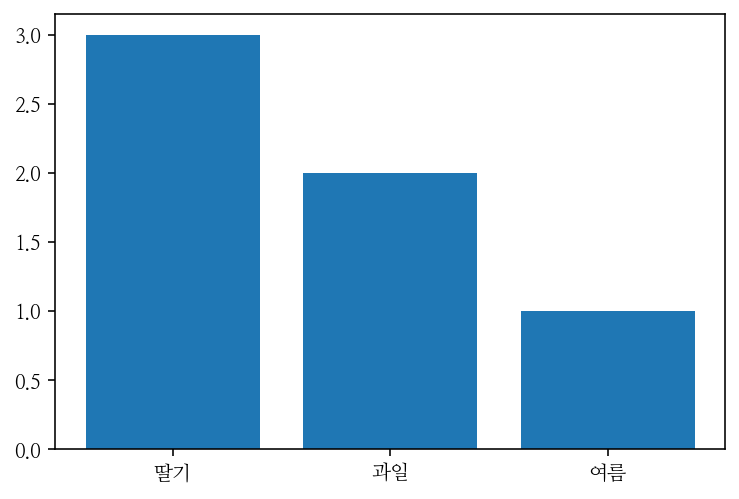

In [17]:
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt

plt.bar(range(len(wordInfo_sample)), sorted_values_sample) # X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample) # X축의 위치, 각 x의 라벨
plt.show()

## 그래프 그리기

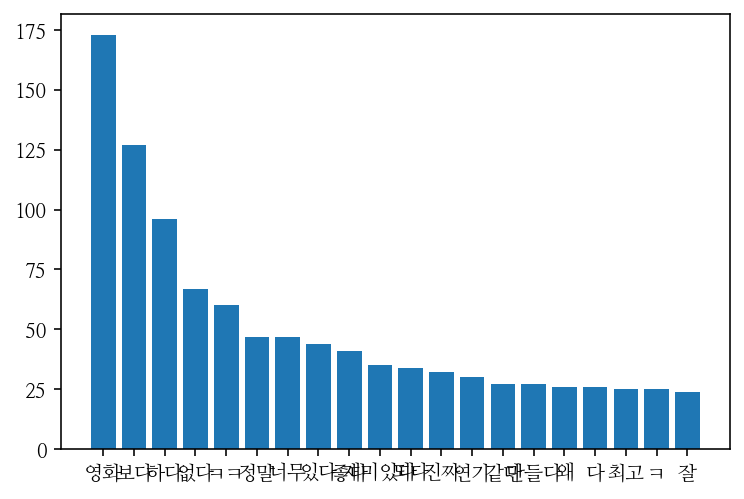

In [18]:
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)
import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()